In [1]:
import os
import sys
sys.path.append('/nfs/h1/userhome/ChenXiaYu/workingdir/code/MagicBox')
import numpy as np
import nibabel as nib
import seaborn as sns
from os.path import join as pjoin
from matplotlib import pyplot as plt
from cxy_visual_dev.lib.predefine import proj_dir, Atlas, get_rois,\
    hemi2stru, hemi2Hemi
from magicbox.io.io import CiftiReader

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/distribution')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

# 画主次梯度值在EDLV四个部分内的分布

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


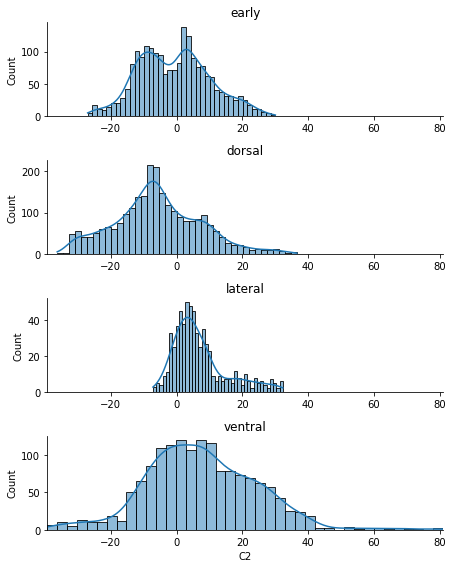

In [3]:
figsize = (6.4, 8)
pc_num = 2
hemi = 'rh'
Hemi = hemi2Hemi[hemi]
vis_mask = Atlas('HCP-MMP').get_mask(get_rois(f'MMP-vis3-{Hemi}'))[0]
pc_file = pjoin(anal_dir, f'decomposition/HCPY-M+corrT_MMP-vis3-{Hemi}_zscore1_PCA-subj.dscalar.nii')
edlv_file = pjoin(proj_dir, 'data/HCP/HCP-MMP1_visual-cortex3_EDLV.dlabel.nii')
out_file = pjoin(work_dir, f'C{pc_num}-dist_in_EDLV-{Hemi}.jpg')
# out_file = 'show'

pc_map = nib.load(pc_file).get_fdata()[pc_num-1][vis_mask]
xlim = (pc_map.min(), pc_map.max())
reader = CiftiReader(edlv_file)
edlv_map = reader.get_data()[0, vis_mask]
lbl_tab = reader.label_tables()[0]
edlv_keys = np.unique(edlv_map)

n_edlv = len(edlv_keys)
fig, axes = plt.subplots(n_edlv, 1, figsize=figsize)
for row_idx, k in enumerate(edlv_keys):
    ax = axes[row_idx]
    data = pc_map[edlv_map == k]
    sns.histplot(data=data, kde=True, ax=ax, bins=40)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(*xlim)
    ax.set_title(lbl_tab[k].label.lstrip(f'{Hemi}_'))
ax.set_xlabel(f'C{pc_num}')

fig.tight_layout()
if out_file == 'show':
    fig.show()
else:
    fig.savefig(out_file)
